## Classification

features:
labels: unique genre
training sample:
test sample:


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, shapiro, ttest_ind, ttest_rel, norm
from ast import literal_eval
from scipy import stats

In [ ]:
import pandas as pd
from ast import literal_eval

url='https://drive.google.com/file/d/1qvEcBTp0YoxBaCfyvj5_vh99J6qR6HWY/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
song = pd.read_csv(url, converters={"artists": literal_eval})
song.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,[Carl Woitschach],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"[Robert Schumann, Vladimir Horowitz]",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,[Seweryn Goszczyński],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,[Francisco Canaro],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"[Frédéric Chopin, Vladimir Horowitz]",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [ ]:
url='https://drive.google.com/file/d/1hPKmiRJy2Gb_rwqWcrY9OwMNk-Zn7PVK/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
genre = pd.read_csv(url)
genre.head()

<ipython-input-5-8f651a391d91>:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  genre = pd.read_csv(url)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre,name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap,Venom


## Define features and labels

### We want to predict the genre in the song dataset. So we can only use the feature which are present on both ds.

In [ ]:
[x for  x in genre.columns if x in song.columns]

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'id',
 'duration_ms',
 'name']

## checking distribution for duration and genre

### Hypothesis: if the duration has a meaningful relation with the genres? If so we can include it in the features.

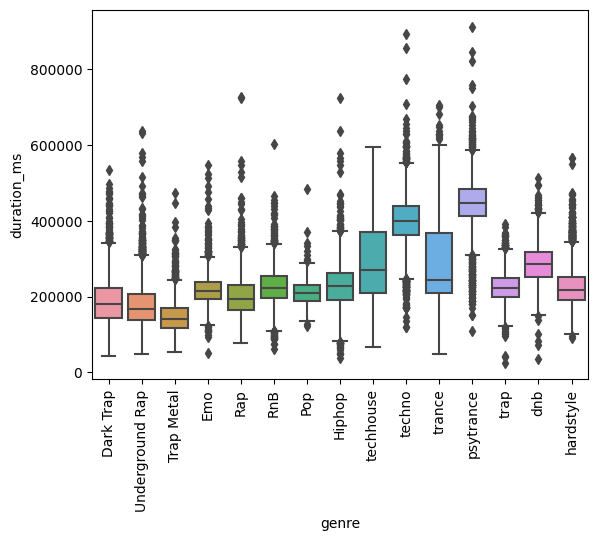

In [ ]:
x = sns.boxplot(data = genre, x='genre', y = 'duration_ms')
x.tick_params(axis = 'x', rotation = 90)

### hypothesis: maybe there is a correlation between energy and tempo? if so we can eliminate one, so that the algorithm doesn't get confused.

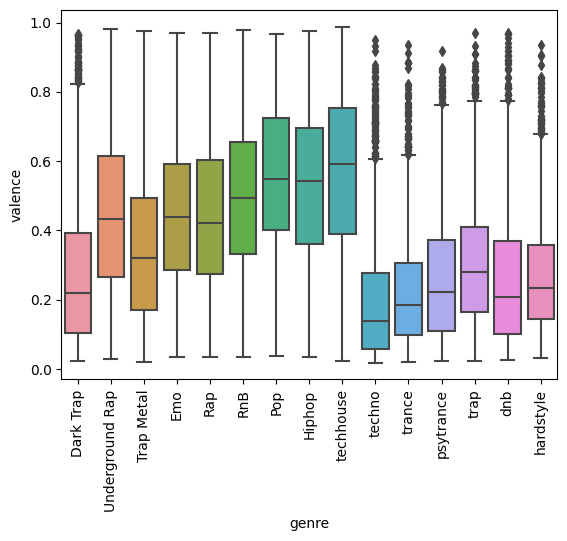

In [ ]:
x = sns.boxplot(data = genre, x='genre', y = 'valence')
x.tick_params(axis = 'x', rotation = 90)

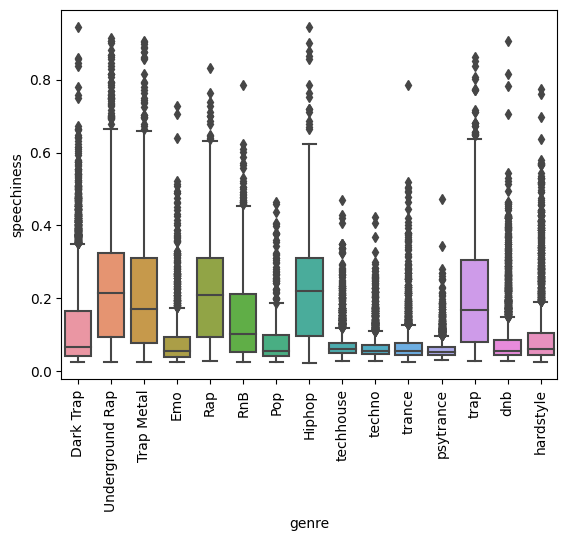

In [ ]:
x = sns.boxplot(data = genre, x='genre', y = 'speechiness')
x.tick_params(axis = 'x', rotation = 90)

<Axes: xlabel='energy', ylabel='tempo'>

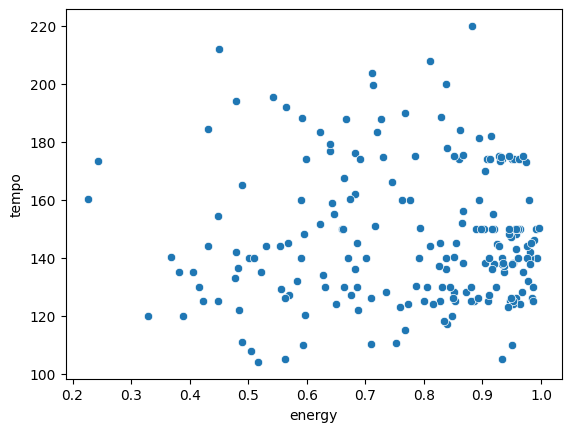

In [ ]:
sns.scatterplot(data = genre.sample(n=200) , x = 'energy', y = 'tempo')

###hypothesis: correlation between valence and danceabilty?





<Axes: xlabel='danceability', ylabel='valence'>

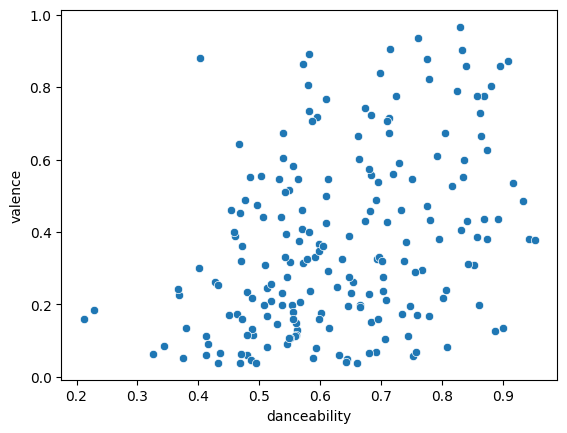

In [ ]:
sns.scatterplot(data = genre.sample(n=200), x= 'danceability', y = 'valence')

In [ ]:
corr_coeficient, pvalue = pearsonr(genre.danceability, genre.valence)
print(corr_coeficient, pvalue)

0.3698446982406279 0.0


In [ ]:
genre.genre.value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

feature list :
'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms'

---

labels: Underground Rap ,
Dark Trap  ,
Hiphop  ,
trance   ,
trap   ,
techhouse,
dnb        ,
psytrance
techno
hardstyle
RnB
Trap Metal
Rap
Emo
Pop

### Divide into training and testing dataset

### The main dataset to be used for the training

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
genre_training = genre[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms','genre']]

In [ ]:
genre_trainds, genre_testds = train_test_split(genre_training, test_size=0.2, random_state=5758658)

In [ ]:
train, test = train_test_split(genre_training, test_size=0.2, random_state=5758658)
X_train = train[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
X_test = test[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
y_train = train['genre']
y_test = test['genre']

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [ ]:
X_train_norm.shape

(33844, 12)

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# apply standardization on numerical features
for i in num_cols:

    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])

    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])

    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [ ]:
print(genre_testds.shape[0]/genre.shape[0])

0.2


In [ ]:
genre_testds.value_counts("genre")/genre_testds.shape[0]

genre
Underground Rap    0.140409
Dark Trap          0.107198
trap               0.076469
dnb                0.073514
techhouse          0.073277
Hiphop             0.070795
hardstyle          0.069732
trance             0.069495
psytrance          0.067604
techno             0.065831
RnB                0.047394
Trap Metal         0.045385
Rap                0.042194
Emo                0.041484
Pop                0.009219
dtype: float64

In [ ]:
genre.value_counts("genre")/genre.shape[0]

genre
Underground Rap    0.138872
Dark Trap          0.108214
Hiphop             0.071575
trance             0.070890
trap               0.070606
techhouse          0.070323
dnb                0.070110
psytrance          0.069992
techno             0.069874
hardstyle          0.069401
RnB                0.049616
Trap Metal         0.046236
Rap                0.043683
Emo                0.039712
Pop                0.010897
dtype: float64

### Train the model!

We decided to choose a classification machine learning method since we had distinct labels for genre.

### Original Data

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
classifier = RandomForestClassifier()
train_features = genre_trainds[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
train_label = genre_trainds['genre']
classifier.fit(X=train_features, y=train_label)

RandomForestClassifier()

### Normalized data

In [ ]:
norm_clf = RandomForestClassifier(max_depth=14)
norm_clf.fit(X_train_norm,y_train)

RandomForestClassifier(max_depth=14)

##Visuallizing the tree

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

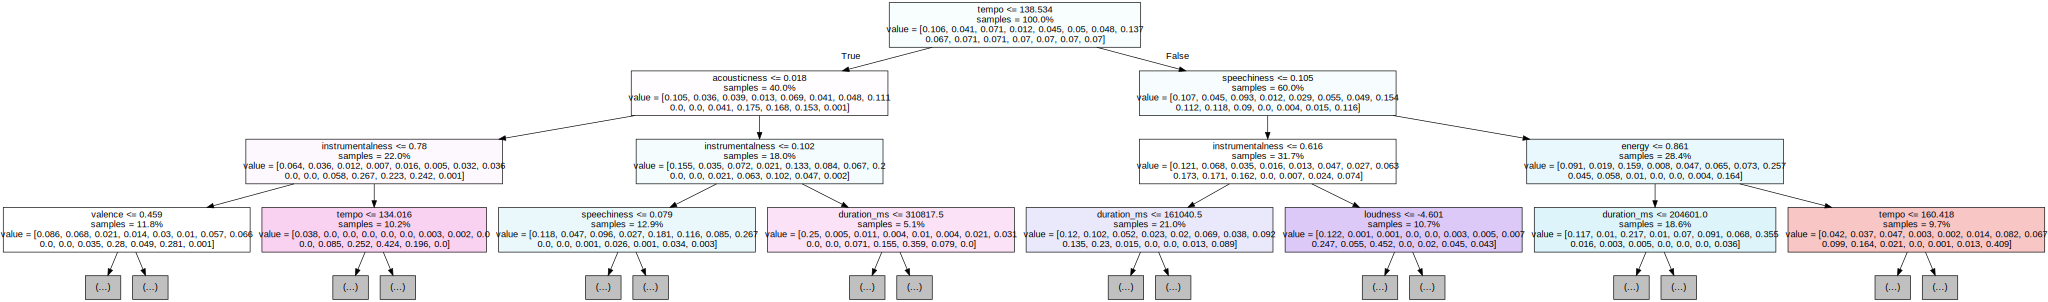

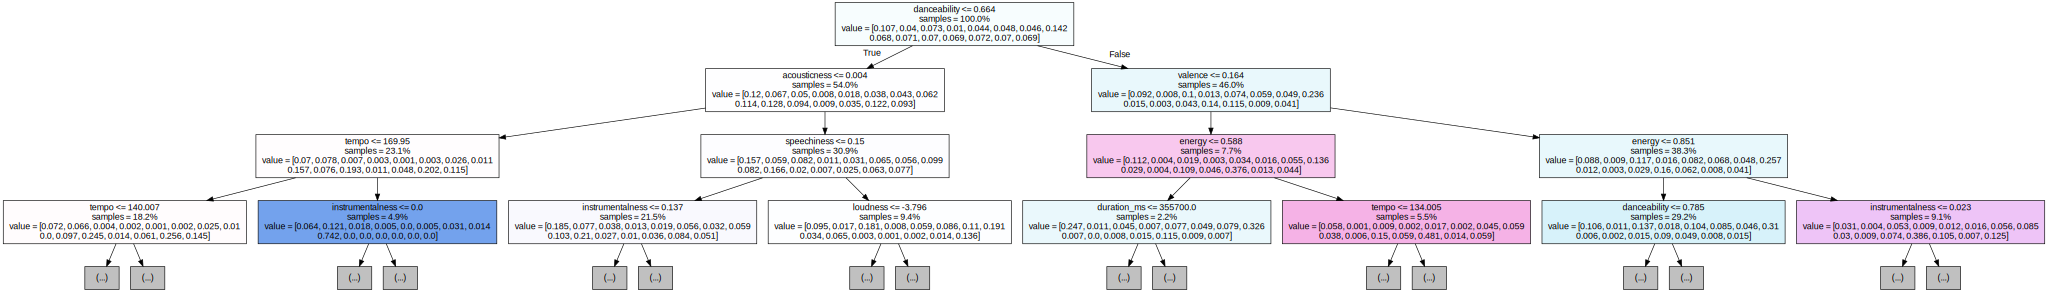

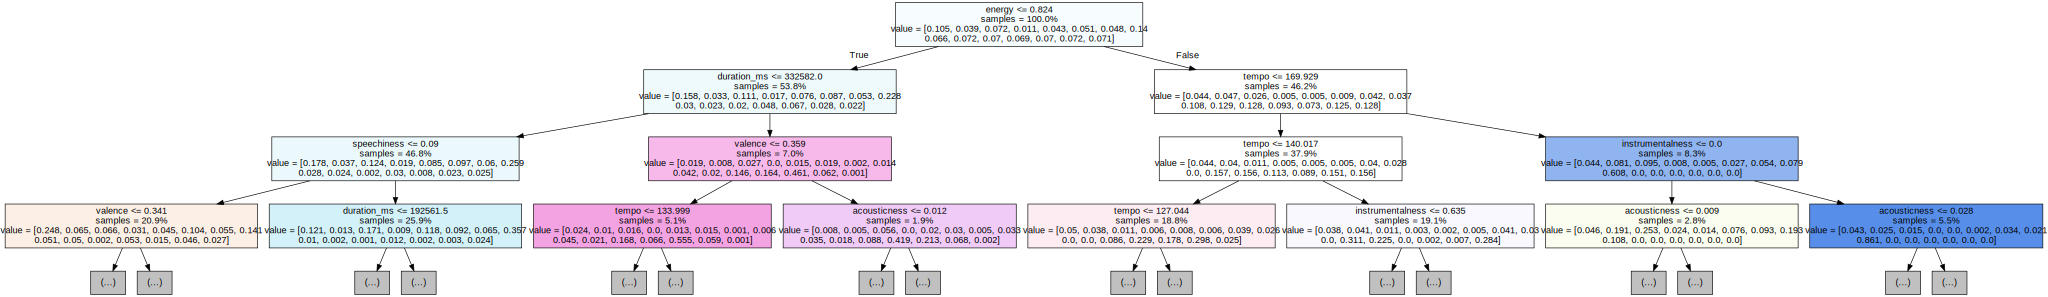

In [ ]:
for i in range(3):
    tree = classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=train_features.columns,
                               filled=True,
                               max_depth=3,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

##Checking the performance of the model

In [ ]:
predict_trained = classifier.predict(train_features)
f1_score(train_label, predict_trained, average='macro')

0.9420679325740707

In [ ]:
X_test

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
23175,0.627,0.948,7,-4.478,1,0.0428,0.003540,0.55100,0.0599,0.5690,125.048,190080
23228,0.771,0.957,10,-5.545,0,0.0548,0.000037,0.94800,0.0807,0.4320,128.008,391848
30548,0.636,0.814,11,-7.327,1,0.1190,0.001350,0.87200,0.3360,0.0363,136.975,469489
40464,0.448,0.912,11,-3.688,0,0.0464,0.000236,0.00122,0.3590,0.2680,149.997,195750
41031,0.423,0.857,6,-5.533,0,0.0560,0.021200,0.00177,0.1300,0.2080,149.983,234862
...,...,...,...,...,...,...,...,...,...,...,...,...
19808,0.736,0.835,8,-1.296,1,0.0604,0.009220,0.00000,0.1410,0.1440,145.994,147962
27030,0.890,0.787,7,-7.684,1,0.1080,0.000065,0.82600,0.1070,0.4330,124.996,439355
14163,0.647,0.706,6,-6.023,0,0.1370,0.264000,0.00000,0.1140,0.5770,153.973,182338
20998,0.823,0.733,1,-5.474,1,0.0628,0.034900,0.00000,0.3240,0.3970,195.944,284387


In [ ]:
pred_norm_trained = norm_clf.predict(X_test_norm)
f1_score(y_test,pred_norm_trained, average='macro')

0.6301277428291419

In [ ]:
test_feature = genre_testds[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
test_label = genre_testds['genre']
predict_test = classifier.predict(test_feature)

In [ ]:
f1_score(test_label, predict_test, average='macro')

0.6264195082021928

#(Optional) improving the model

### changing the dataset features


*   Removing the duration as a feature

*   choosing higher n_estimator

*   max_depth: tried between 5 to 20



In [ ]:
classifier = RandomForestClassifier(n_estimators=500, max_depth=14)
train_features = genre_trainds[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
train_label = genre_trainds['genre']
classifier.fit(X=train_features, y=train_label)

RandomForestClassifier(max_depth=14, n_estimators=500)

In [ ]:
predict_trained = classifier.predict(train_features)
f1_score(train_label, predict_trained, average='macro')

0.8557935342035438

In [ ]:
test_feature = genre_testds[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
test_label = genre_testds['genre']
predict_test = classifier.predict(test_feature)

In [ ]:
f1_score(test_label, predict_test, average='macro')

0.6009453444045808

In [ ]:
accuracy = accuracy_score(test_label, predict_test)
print(accuracy)

0.6534688571090888



*   with n=500 and max-depth=16 we got 64percent

*   with n=500 and max-depth=15 we got 65percent




###changing the dataset features 2.0


*   Removing the mode as a feature

*   using the optimized n_estimator and depth (175,13)



In [ ]:
classifier = RandomForestClassifier(n_estimators=175, max_depth=13)
train_features = genre_trainds[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
train_label = genre_trainds['genre']
classifier.fit(X=train_features, y=train_label)

RandomForestClassifier(max_depth=13, n_estimators=175)

In [ ]:
predict_trained = classifier.predict(train_features)
f1_score(train_label, predict_trained, average='macro')

0.8108809287258119

In [ ]:
test_feature = genre_testds[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
test_label = genre_testds['genre']
predict_test = classifier.predict(test_feature)

In [ ]:
f1_score(test_label, predict_test, average='macro')

0.6011478452677544

In [ ]:
accuracy = accuracy_score(test_label, predict_test)
print(accuracy)

0.6546507505023047



*   with n=500 and max-depth=16 we got 64percent

*   with n=500 and max-depth=15 we got 65percent




### Optimizing the model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(train_features, train_label)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fadef517a90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fadef4fcbe0>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 187}


I tried with class_weight, it didn't change performance on its own.

checked max_feature: no change

In [ ]:
opt_classifier = RandomForestClassifier(n_estimators=175, max_depth=15, max_features="log2")
train_features = genre_trainds[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
train_label = genre_trainds['genre']
opt_classifier.fit(X=train_features, y=train_label)

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=175)

In [ ]:
opt_predict_test = opt_classifier.predict(test_feature)

In [ ]:
f1_score(test_label, opt_predict_test, average='macro')

0.6025001639019406

In [ ]:
accuracy = accuracy_score(test_label, predict_test)
print(accuracy)

0.6534688571090888


##checking the normalized trained model

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train_norm, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f3898c06290>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f3898c07a30>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 305}


Training the normalized model with new parameters

In [ ]:
opt_clf_norm = RandomForestClassifier(max_depth=14, n_estimators=210, min_samples_split=2,verbose=1)

# training it with normalized data
opt_clf_norm.fit(X_train_norm, y_train)

# test the model
pred_opt_norm = opt_clf_norm.predict(X_test_norm)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   25.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    0.6s finished


In [ ]:
print(f1_score(y_test, pred_opt_norm, average='macro'))

0.6298996428808424


| max_depth | n_estimator | min_sample_leaf |min_samples_split|f1_score|
|-----------|-------------|-----------------|-----------------|--------|
| 17        | 305         | 1               |  | 62.7%|
|14|210|     | 10|  62.9%  |
| 14        |  175        | 1               | |63.3%  |
|14|175|3|   |62.9%|
| 14        | 175         | 5               |    |62.8%|
|14|175|     |3|63.1%|
|14|175|     |10|63.0%|




###try different models, different parameters, etc... to make the prediction better

#Use the model to predict the unseen data